In [1]:
import pandas as pd
from tabulate import tabulate
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Load the saved data set

In [2]:
training_data = pd.read_csv("../../data/training_model_data.csv")
training_data.head()

,date_id,item_dept,store,item_qty,net_sales,item_qty_lag_1,net_sales_lag_1,item_qty_lag_2,net_sales_lag_2,item_qty_lag_3,net_sales_lag_3,item_qty_lag_4,net_sales_lag_4,item_qty_lag_5,net_sales_lag_5
0,2021-11-01,Beverages,ABC,917.000,254547.79901,1707.363846,372950.198262,1708.440871,373055.925404,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
1,2021-11-01,Beverages,XYZ,779.000,187931.76902,917.000000,254547.799010,1708.440871,373055.925404,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
2,2021-11-01,Grocery,ABC,2360.399,437286.62402,779.000000,187931.769020,917.000000,254547.799010,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
3,2021-11-01,Grocery,XYZ,2987.060,491450.72300,2360.399000,437286.624020,779.000000,187931.769020,917.000000,254547.799010,1704.45565,372399.76516,1706.125587,372753.105928
4,2021-11-01,Household,ABC,1043.000,247336.26601,2987.060000,491450.723000,2360.399000,437286.624020,779.000000,187931.769020,917.00000,254547.79901,1706.125587,372753.105928


In [3]:
# Encode categorical variables
label_encoder_store = LabelEncoder()
label_encoder_dept = LabelEncoder()

In [4]:
training_data['store'] = label_encoder_store.fit_transform(training_data['store'])
training_data['item_dept'] = label_encoder_dept.fit_transform(training_data['item_dept'])
training_data.head()

,date_id,item_dept,store,item_qty,net_sales,item_qty_lag_1,net_sales_lag_1,item_qty_lag_2,net_sales_lag_2,item_qty_lag_3,net_sales_lag_3,item_qty_lag_4,net_sales_lag_4,item_qty_lag_5,net_sales_lag_5
0,2021-11-01,0,0,917.000,254547.79901,1707.363846,372950.198262,1708.440871,373055.925404,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
1,2021-11-01,0,1,779.000,187931.76902,917.000000,254547.799010,1708.440871,373055.925404,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
2,2021-11-01,1,0,2360.399,437286.62402,779.000000,187931.769020,917.000000,254547.799010,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
3,2021-11-01,1,1,2987.060,491450.72300,2360.399000,437286.624020,779.000000,187931.769020,917.000000,254547.799010,1704.45565,372399.76516,1706.125587,372753.105928
4,2021-11-01,2,0,1043.000,247336.26601,2987.060000,491450.723000,2360.399000,437286.624020,779.000000,187931.769020,917.00000,254547.79901,1706.125587,372753.105928


In [5]:
# Define features and target variables for item_qty prediction
X_train = training_data[['date_id', 'item_dept', 'store', 'item_qty_lag_1', 'net_sales_lag_1', 
                         'item_qty_lag_2', 'net_sales_lag_2', 'item_qty_lag_3', 'net_sales_lag_3', 
                         'item_qty_lag_4', 'net_sales_lag_4', 'item_qty_lag_5', 'net_sales_lag_5']]
y_train_qty = training_data['item_qty']

In [6]:
# Convert date_id to numerical value for XGBoost
X_train['date_id'] = pd.to_datetime(X_train['date_id']).map(pd.Timestamp.toordinal)

C:\Users\User\AppData\Local\Temp\ipykernel_32\2354581374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['date_id'] = pd.to_datetime(X_train['date_id']).map(pd.Timestamp.toordinal)


### Model Building with XGBoost

In [7]:
# Train the XGBoost model for item_qty
model_qty = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model_qty.fit(X_train, y_train_qty)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
# Predict on the training dataset
y_train_pred_qty = model_qty.predict(X_train)

In [9]:
# Calculate metrics for item_qty
mse_qty = mean_squared_error(y_train_qty, y_train_pred_qty)
rmse_qty = np.sqrt(mse_qty)
r2_qty = r2_score(y_train_qty, y_train_pred_qty)
mape_qty = mean_absolute_percentage_error(y_train_qty, y_train_pred_qty)

In [10]:
# Print the results
print(f"Item Qty - MSE: {mse_qty}, RMSE: {rmse_qty}, R-squared: {r2_qty}, MAPE: {mape_qty}")

Item Qty - MSE: 7850.009274310539, RMSE: 88.60027807129354, R-squared: 0.9922724898804044, MAPE: 0.042173251354541225


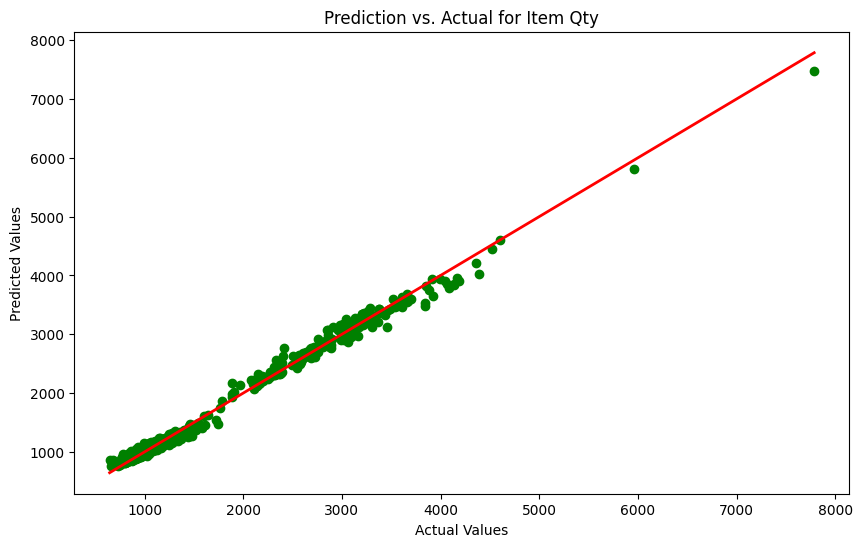

In [11]:
# Plotting Prediction vs. Actual for item_qty
plt.figure(figsize=(10, 6))
plt.scatter(y_train_qty, y_train_pred_qty, color="green")
plt.plot([min(y_train_qty), max(y_train_qty)], [min(y_train_qty), max(y_train_qty)], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual for Item Qty")
plt.show()

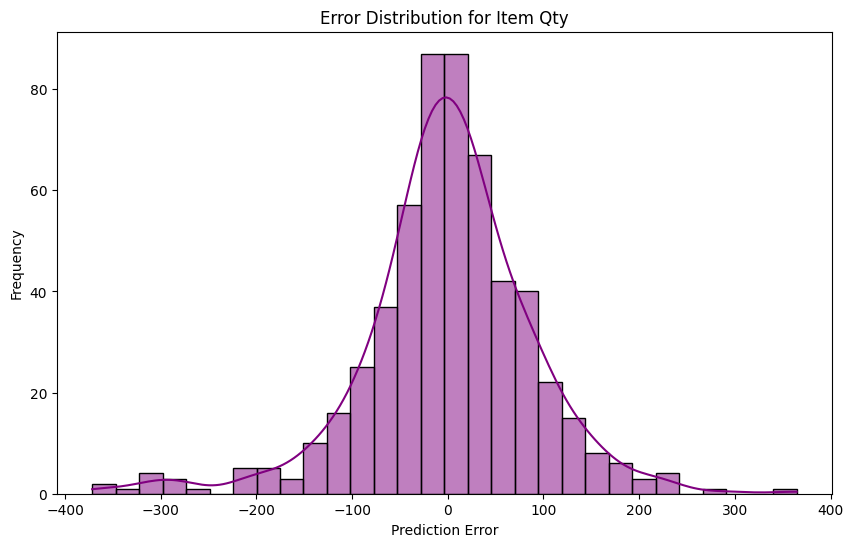

In [12]:
# Plotting Error Distribution for item_qty
plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred_qty - y_train_qty, bins=30, kde=True, color="purple")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution for Item Qty")
plt.show()

### Model Builiding with Linear Regression

In [13]:
# Train the XGBoost model for item_qty
model_qty = LinearRegression()
model_qty.fit(X_train, y_train_qty)

LinearRegression()

In [14]:
y_train_pred_qty = model_qty.predict(X_train)

In [15]:
# Calculate metrics
mse_qty = mean_squared_error(y_train_qty, y_train_pred_qty)
rmse_qty = np.sqrt(mse_qty)
r2_qty = r2_score(y_train_qty, y_train_pred_qty)
mape_qty = mean_absolute_percentage_error(y_train_qty, y_train_pred_qty)

In [16]:
# Print the results
print(f"Item Qty - MSE: {mse_qty}, RMSE: {rmse_qty}, R-squared: {r2_qty}, MAPE: {mape_qty}")

Item Qty - MSE: 253327.45126009485, RMSE: 503.3164524035498, R-squared: 0.7506257158714388, MAPE: 0.2642583746802056


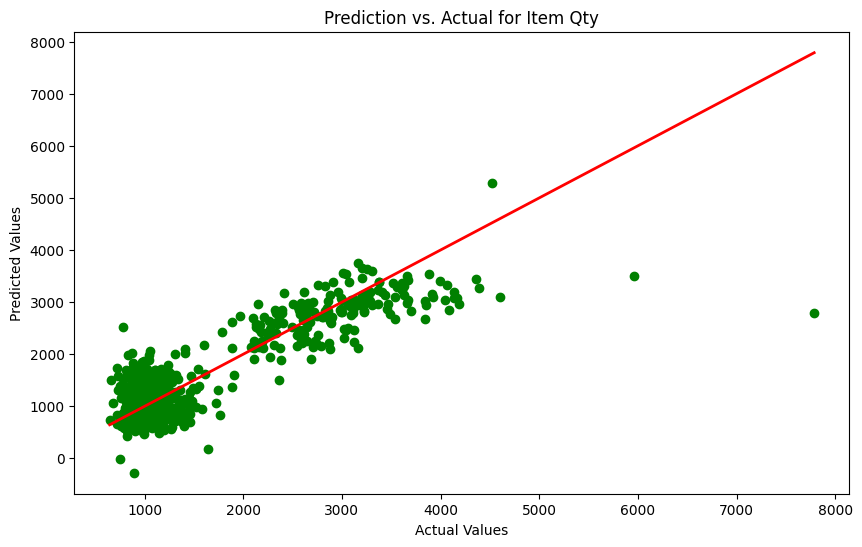

In [17]:
# Prediction vs. Actual Plot for item_qty
plt.figure(figsize=(10, 6))
plt.scatter(y_train_qty, y_train_pred_qty, color="green")
plt.plot([min(y_train_qty), max(y_train_qty)], [min(y_train_qty), max(y_train_qty)], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual for Item Qty")
plt.show()

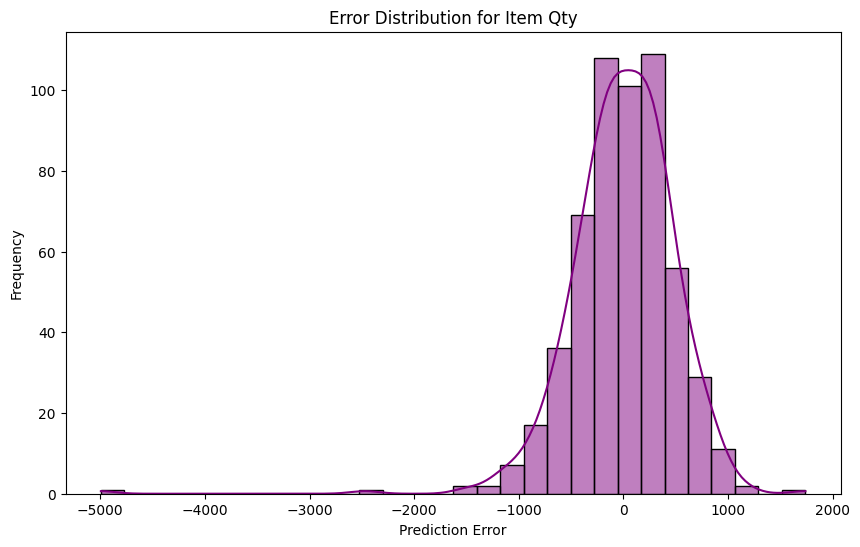

In [18]:
# Error Distribution Plot for item_qty
plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred_qty - y_train_qty, bins=30, kde=True, color="purple")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution for Item Qty")
plt.show()

### Model Builiding with Random Forest Regressor

In [19]:
# Train the XGBoost model for net_sales
model_qty = RandomForestRegressor(n_estimators=100, random_state=42)
model_qty.fit(X_train, y_train_qty)

RandomForestRegressor(random_state=42)

In [20]:
y_train_pred_qty = model_qty.predict(X_train)

In [21]:
# Calculate metrics
mse_qty = mean_squared_error(y_train_qty, y_train_pred_qty)
rmse_qty = np.sqrt(mse_qty)
r2_qty = r2_score(y_train_qty, y_train_pred_qty)
mape_qty = mean_absolute_percentage_error(y_train_qty, y_train_pred_qty)

In [22]:
# Print the results
print(f"Item Qty - MSE: {mse_qty}, RMSE: {rmse_qty}, R-squared: {r2_qty}, MAPE: {mape_qty}")

Item Qty - MSE: 24175.842865249473, RMSE: 155.48582850295224, R-squared: 0.9762014204234966, MAPE: 0.048976854521089234


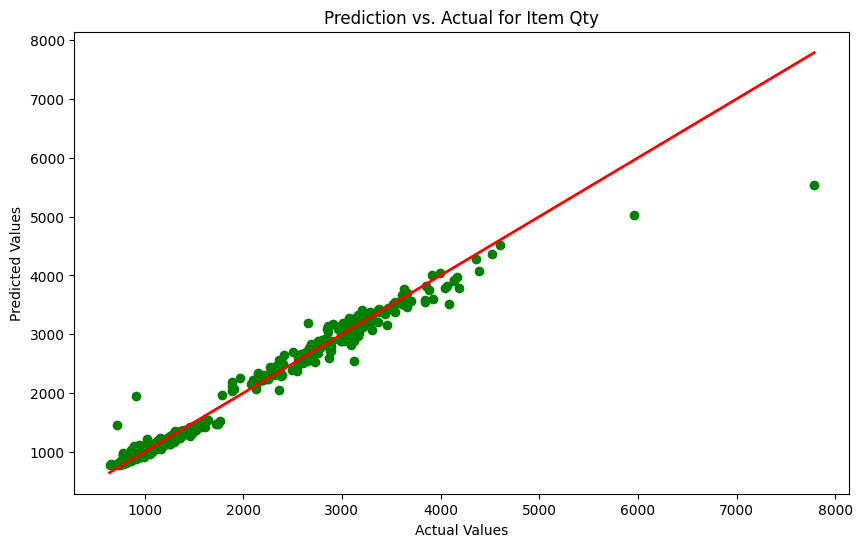

In [23]:
# Prediction vs. Actual Plot for item_qty
plt.figure(figsize=(10, 6))
plt.scatter(y_train_qty, y_train_pred_qty, color="green")
plt.plot([min(y_train_qty), max(y_train_qty)], [min(y_train_qty), max(y_train_qty)], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual for Item Qty")
plt.show()

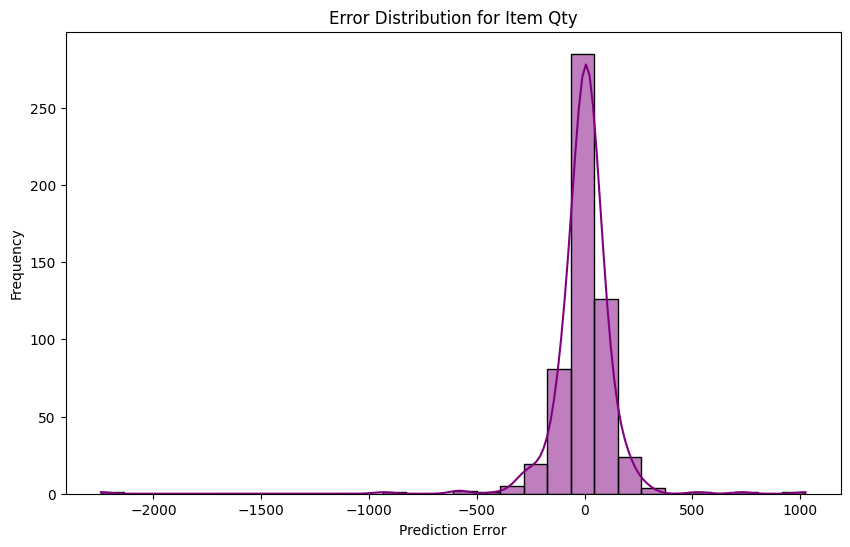

In [24]:
# Error Distribution Plot for item_qty
plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred_qty - y_train_qty, bins=30, kde=True, color="purple")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution for Item Qty")
plt.show()